# #03 - Exploring Visualization


PyMove also has a visualization module to perform visual analysis on the data. These views make use of libraries like Matplotlib and Folium!

**Hands-on!**

---

## 1. Imports


In [1]:
import pymove
from pymove import MoveDataFrame
from pymove.visualization import visualization

---
## 2. Load Data

In [2]:
move_df = pymove.read_csv('examples/geolife_sample.csv')
move_df.head()

lat         lon            datetime  id
0  39.984094  116.319236 2008-10-23 05:53:05   1
1  39.984198  116.319322 2008-10-23 05:53:06   1
2  39.984224  116.319402 2008-10-23 05:53:11   1
3  39.984211  116.319389 2008-10-23 05:53:16   1
4  39.984217  116.319422 2008-10-23 05:53:21   1

## 3. Exploring visualization module

### a. Generate colors 

We have a function that allows you to generate random colors so you can have more color options in your visualizations!

In [3]:
visualization.generate_color()

'#FFB6C1'

Or passing intensity of each color will generate the color rgb

In [4]:
rgb = visualization.rgb([0.6, 0.2, 0.2])
rgb

(51, 51, 153)

With this rbg tuple you can generate hex colors!

In [5]:
visualization.hex_rgb([0.6, 0.2, 0.2])

'#333399'

### b. Exploring data over time


We can generate an overview that contains the distribution of data by time period, time, date, and day of the week to better understand how data is distributed.

Creating date features...
..Date features was created...


Creating or updating a feature for hour...

...Hour feature was created...


Creating or updating period feature
...early morning from 0H to 6H
...             morning from 6H to 12H
...afternoon from 12H to 18H
...evening from 18H to 24H
...the period of day feature was created

Creating or updating day of the week feature...

...the day of the week feature was created...



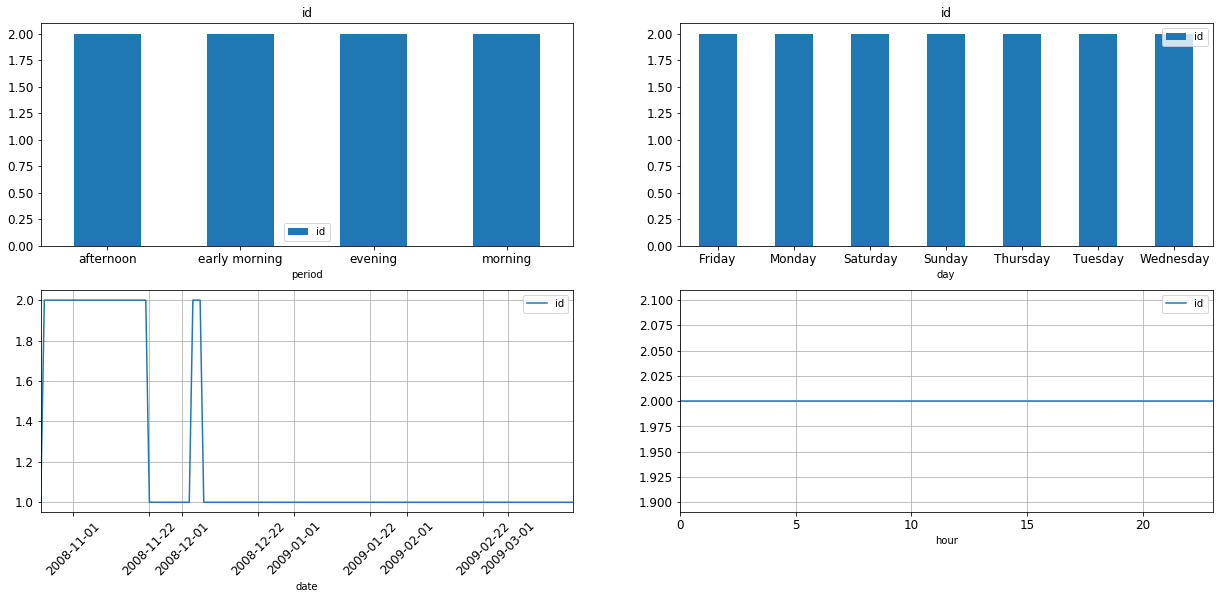

In [6]:
visualization.show_object_id_by_date(move_df)

We can generate a visualization of the trajectory points filtered by:
- **Day week**

In [7]:
visualization.plot_trajectory_by_day_week(move_df, 'Sunday', color='#8A2BE2')


Creating or updating day of the week feature...

...the day of the week feature was created...



- **Period of day**

In [8]:
visualization.plot_trajectory_by_period(move_df, 'evening')


Creating or updating period feature
...early morning from 0H to 6H
...             morning from 6H to 12H
...afternoon from 12H to 18H
...evening from 18H to 24H
...the period of day feature was created


- **Period of time with start date and end date**

In [9]:
visualization.plot_trajectory_by_date(move_df, '2008-10-23', '2008-10-23')

Creating date features...
..Date features was created...



- **Period of time with start and end time**

In [12]:
visualization.plot_trajectory_by_hour(move_df, 1, 1)

- ****

## c. Exploring trajectories

- **Plot all trajectories**

In [14]:
visualization.plot_trajectories_with_folium(move_df, n_rows=10000)

- **Plot trajectory by id**

With Matplotlib


Creating or updating tid feature...

...Sorting by id and datetime to increase performance


...tid feature was created...



(           lat         lon            datetime  id       day         period  \
 0    39.984094  116.319236 2008-10-23 05:53:05   1  Thursday  early morning   
 1    39.984198  116.319322 2008-10-23 05:53:06   1  Thursday  early morning   
 2    39.984224  116.319402 2008-10-23 05:53:11   1  Thursday  early morning   
 3    39.984211  116.319389 2008-10-23 05:53:16   1  Thursday  early morning   
 4    39.984217  116.319422 2008-10-23 05:53:21   1  Thursday  early morning   
 ..         ...         ...                 ...  ..       ...            ...   
 109  39.979758  116.324513 2008-10-23 05:59:47   1  Thursday  early morning   
 110  39.979743  116.324668 2008-10-23 05:59:50   1  Thursday  early morning   
 111  39.979725  116.324794 2008-10-23 05:59:52   1  Thursday  early morning   
 112  39.979691  116.324938 2008-10-23 05:59:54   1  Thursday  early morning   
 113  39.979672  116.325033 2008-10-23 05:59:59   1  Thursday  early morning   
 
            date  hour          tid  


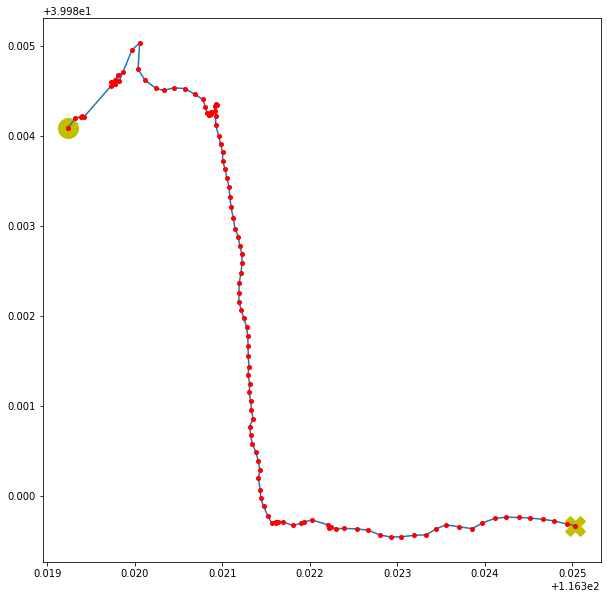

In [22]:
move_df.generate_tid_based_on_id_datatime()
move_df.plot_traj_id(move_df['tid'][0])

Or with Folium

In [16]:
visualization.plot_trajectory_by_id_with_folium(move_df, 1, n_rows=1000, color="orange")

- **Heat map**

In [18]:
visualization.heatmap(move_df, 10000)

- **Plot cluster**

In [19]:
visualization.cluster(move_df, 1000)

- **Faster MarkerCluster**

In [20]:
visualization.faster_cluster(move_df, 1000)

### 3.6. Show trajectory by id

### 3.7. Show lat,lon GPS

In [ ]:
show_lat_lon_GPS(move_df)

### 3.8. Show object id by date

In [ ]:
base_map = visualization.create_base_map([39.984094, 116.319236])
base_map

In [ ]:
stops = move_df.loc[:5, ['lat', 'lon']]

In [ ]:
import folium
for stop in stops.iterrows():
    print(stop[1]['lat'])
    base_map.add_child(folium.Circle([stop[1]['lat'], stop[1]['lon']], color=visualization.generate_color(), weight=3, radius=20, opacity=0.5,
                                        popup = "Stop",
                                      fill_color=visualization.generate_color(),
                                      fill_opacity=0.5,))